In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [128]:
#%matplotlib widget
%matplotlib inline

In [129]:
#from platform import python_version
#python_version()

In [130]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [131]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'NGC_2204'

## Getting RA&DEC from Bica 2019

In [132]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]
ra, dec

(93.89583, -18.6625)

## Querying the data

In [133]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [134]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [135]:
query = """SELECT 
source_id, ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.5))'

In [136]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [137]:
data = job.get_results()
len(data)

18396

In [138]:
#data

## Converting to pandas

In [139]:
df = data.to_pandas()
df

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
0,2942722612659805824,93.939871,-18.301818,-0.334318,0.204741,0.743745,0.234000,1.184717,19.250019,0.379827,0.233988,NaN,NaN,225.688907,-15.914363
1,2942585620381477760,93.441024,-18.900270,-1.244583,0.315157,2.213620,0.350897,1.626102,19.753355,-0.041768,0.342079,NaN,NaN,226.060927,-16.588242
2,2942585620381479808,93.438573,-18.898349,2.111404,0.094431,5.393788,0.107727,1.200487,17.993153,0.219424,0.107611,NaN,NaN,226.058120,-16.589596
3,2942585620381480448,93.444739,-18.897692,-8.471453,0.395788,1.941740,0.504179,1.788914,20.001591,1.444075,0.489049,NaN,NaN,226.059932,-16.583989
4,2942585689100963328,93.427799,-18.890628,-1.580176,0.325450,-4.937668,0.364944,2.278633,19.672642,1.216398,0.355737,NaN,NaN,226.046475,-16.595840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18391,2941976185996850432,94.199382,-18.255762,3.793669,0.898156,-0.039478,1.049934,1.721785,20.707710,-1.719510,1.152658,NaN,NaN,225.749034,-15.670447
18392,2941976185996855168,94.194109,-18.255981,0.539988,0.010977,-1.962343,0.012942,1.397979,10.226021,0.735088,0.013704,23.474323,0.166310,225.747130,-15.675112
18393,2941976186000593152,94.191267,-18.259965,-0.202508,0.019126,0.647737,0.022664,1.378074,14.930406,0.104693,0.024665,70.429054,4.750118,225.749772,-15.679197
18394,2941976254716889856,94.190436,-18.254605,-0.079512,0.060024,0.342484,0.067449,0.765039,17.300493,0.261083,0.070418,NaN,NaN,225.744352,-15.677740


In [140]:
#import plotly.express as px

In [141]:
#fig = px.scatter(x = df.pmra_error, y = df.pmra)
#fig.show()

In [142]:
%matplotlib inline

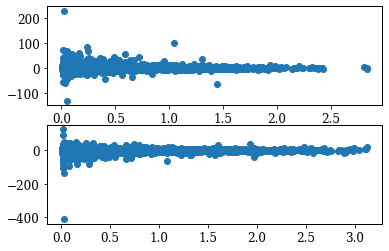

In [143]:
fig, ax = plt.subplots(2)

ax[0].scatter(df.pmra_error,df.pmra)
ax[1].scatter(df.pmdec_error,df.pmdec)

In [144]:
print(np.mean(df.pmdec), np.mean(df.pmdec_error)) ## por que pmra tem um erro muito maior?
print(np.mean(df.pmra), np.mean(df.pmra_error))

0.6195831139196687 0.3792034685611725
0.3613209898726274 0.30154919624328613


## Applying better conditions to the variables

In [145]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(8281, 18396)

## Dropping uknown values of pmra, pmdec or parallax.

In [177]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax', 'parallax_error'])
ndf

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b
2,2942585620381479808,93.438573,-18.898349,2.111404,0.094431,5.393788,0.107727,1.200487,17.993153,0.219424,0.107611,NaN,NaN,226.058120,-16.589596
3,2942585620381480448,93.444739,-18.897692,-8.471453,0.395788,1.941740,0.504179,1.788914,20.001591,1.444075,0.489049,NaN,NaN,226.059932,-16.583989
4,2942585689100963328,93.427799,-18.890628,-1.580176,0.325450,-4.937668,0.364944,2.278633,19.672642,1.216398,0.355737,NaN,NaN,226.046475,-16.595840
5,2942585689100966272,93.432767,-18.887607,-0.629517,0.211036,1.124436,0.238336,0.933456,19.205183,0.489280,0.232594,NaN,NaN,226.045554,-16.590322
7,2942585689100968320,93.428834,-18.885564,2.576077,0.421565,6.866525,0.514282,1.903444,20.181284,1.405111,0.555936,NaN,NaN,226.042044,-16.592912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,2941975941184875776,94.219839,-18.268453,0.671404,0.068509,-2.314572,0.078783,1.175610,17.626810,0.791919,0.086736,NaN,NaN,225.769273,-15.657849
18386,2941975975544612480,94.202365,-18.270968,-4.255072,0.244391,7.429894,0.256445,2.032919,19.231903,0.973598,0.241556,NaN,NaN,225.764661,-15.674034
18387,2941975975544614912,94.213342,-18.266052,-4.315832,0.136975,1.443825,0.156040,1.260046,18.780458,0.764316,0.164559,NaN,NaN,225.764392,-15.662512
18392,2941976185996855168,94.194109,-18.255981,0.539988,0.010977,-1.962343,0.012942,1.397979,10.226021,0.735088,0.013704,23.474323,0.166310,225.747130,-15.675112


In [178]:
from sklearn.preprocessing import StandardScaler

## Creating the arrays to perform the 5-D HDBSCAN fit

In [179]:
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the HDBSCAN

In [180]:
import hdbscan

In [181]:
from sklearn.preprocessing import RobustScaler

scaled = RobustScaler().fit_transform(cincoD)

Estimated no. of clusters: 1
Estimated no. of noise points: 6075
Estimated no. points clustered: 500


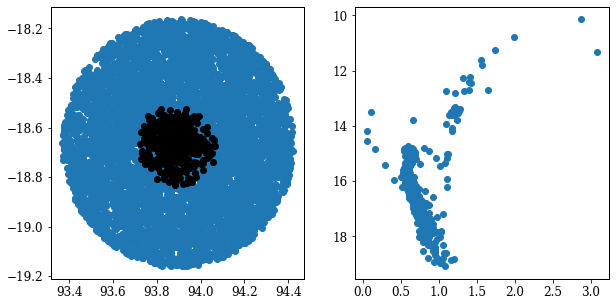

In [182]:
pts_expected = 500

clusterer = hdbscan.HDBSCAN(min_cluster_size = pts_expected, min_samples = pts_expected, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(scaled)

#clusterer = hdbscan.HDBSCAN(min_cluster_size = 500, min_samples = 250, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(cincoD)

labels = clusterer.labels_


ndf = ndf.assign(labels=labels)


N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(clusterer.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(clusterer.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

subset = ndf[ndf.labels == 0]


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(subset.ra,subset.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


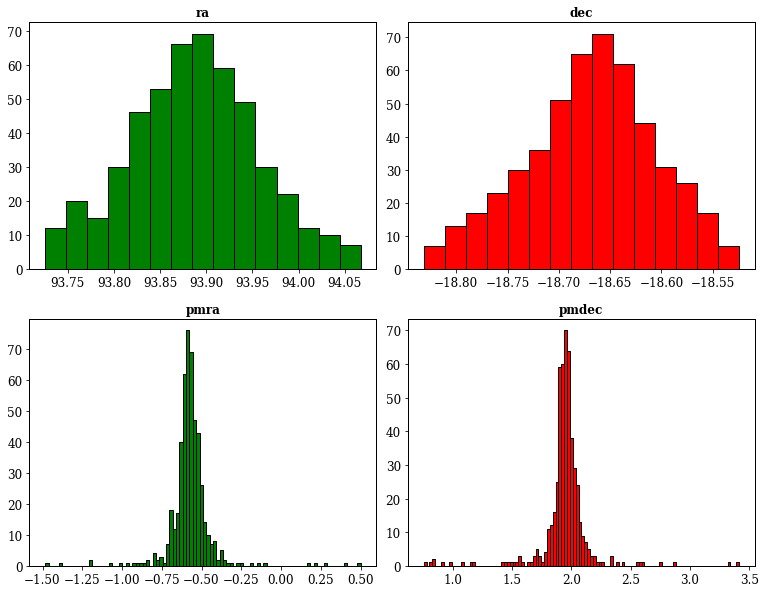

In [183]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


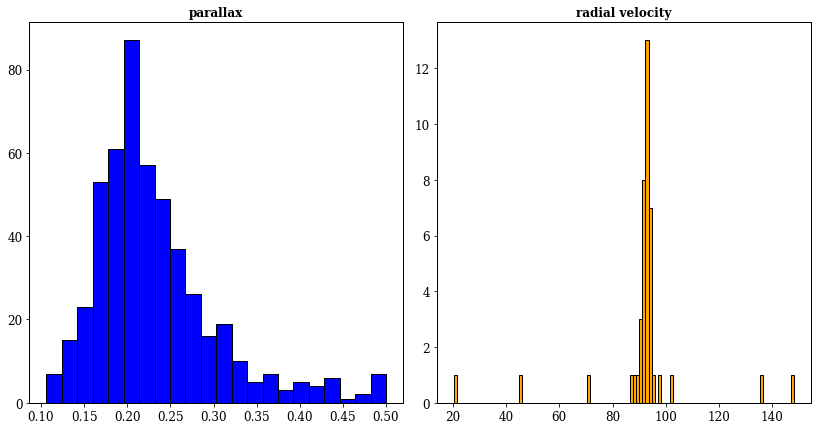

In [184]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Constructing a RDP and histograms of the clusters parameters

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

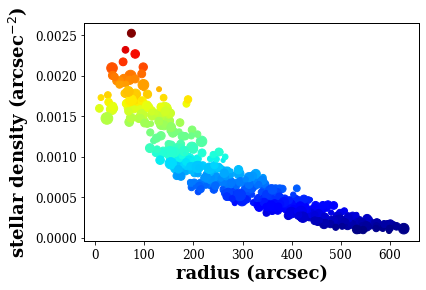

In [185]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors


catalog = SkyCoord(ra=subset['ra']*units.degree, dec=subset['dec']*units.degree, frame='fk5')

nstar = len(subset)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([subset['ra']*np.cos(subset['dec']*np.pi/180.0), subset['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(subset['ra'], weights=den_data)
std_x = np.average((subset['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(subset['dec'], weights=den_data)
std_y = np.average((subset['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(subset['phot_g_mean_mag'])-subset['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## Gaussian fit

In [186]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 22
    # variables        = 3
    chi-square         = 1016.50052
    reduced chi-square = 53.5000276
    Akaike info crit   = 90.3277313
    Bayesian info crit = 93.6008587
[[Variables]]
    amplitude:  8.47001071 +/- 0.51080411 (6.03%) (init = 9.675255)
    center:     0.20454800 +/- 0.00331610 (1.62%) (init = 0.2000262)
    sigma:      0.04791432 +/- 0.00337704 (7.05%) (init = 0.03750099)
    fwhm:       0.11282959 +/- 0.00795231 (7.05%) == '2.3548200*sigma'
    height:     70.5226693 +/- 4.23123876 (6.00%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.589


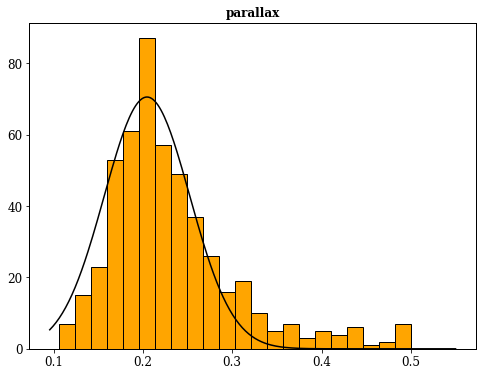

In [187]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0], histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(0.9*bins[0],1.1*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 15
    # variables        = 3
    chi-square         = 224.709873
    reduced chi-square = 18.7258227
    Akaike info crit   = 46.6013987
    Bayesian info crit = 48.7255493
[[Variables]]
    amplitude:  12.1215393 +/- 0.42717281 (3.52%) (init = 11.34109)
    center:     93.8865145 +/- 0.00298097 (0.00%) (init = 93.88416)
    sigma:      0.07370729 +/- 0.00303515 (4.12%) (init = 0.06097362)
    fwhm:       0.17356739 +/- 0.00714723 (4.12%) == '2.3548200*sigma'
    height:     65.6080967 +/- 2.30195278 (3.51%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.588


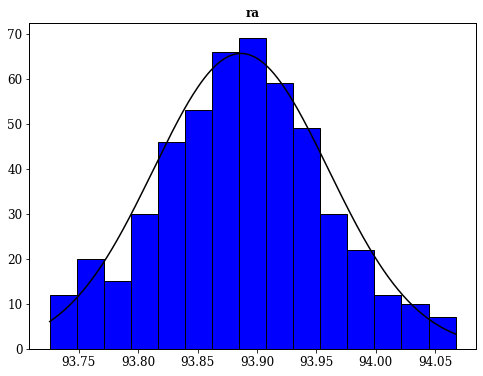

In [188]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 94
    # variables        = 3
    chi-square         = 625.018981
    reduced chi-square = 6.86834046
    Akaike info crit   = 184.081800
    Bayesian info crit = 191.711685
[[Variables]]
    amplitude:  9.26379564 +/- 0.20328184 (2.19%) (init = 12.15826)
    center:    -0.57762986 +/- 0.00134406 (0.23%) (init = -0.5765906)
    sigma:      0.05304247 +/- 0.00134401 (2.53%) (init = 0.05332572)
    fwhm:       0.12490547 +/- 0.00316491 (2.53%) == '2.3548200*sigma'
    height:     69.6747311 +/- 1.52892305 (2.19%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


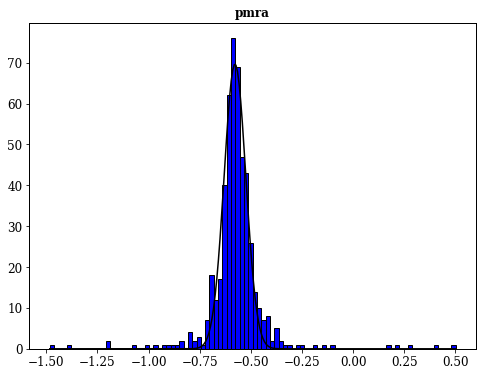

In [189]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 15
    # variables        = 3
    chi-square         = 305.594414
    reduced chi-square = 25.4662012
    Akaike info crit   = 51.2131287
    Bayesian info crit = 53.3372793
[[Variables]]
    amplitude:  10.9595254 +/- 0.45793227 (4.18%) (init = 8.432154)
    center:    -18.6629164 +/- 0.00326792 (0.02%) (init = -18.65609)
    sigma:      0.06836361 +/- 0.00335743 (4.91%) (init = 0.04391747)
    fwhm:       0.16098400 +/- 0.00790614 (4.91%) == '2.3548200*sigma'
    height:     63.9553419 +/- 2.65164484 (4.15%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.594


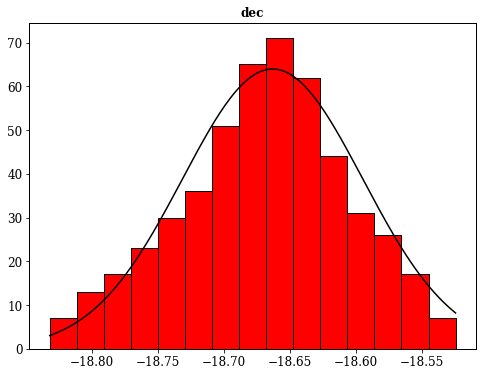

In [190]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 110
    # variables        = 3
    chi-square         = 603.437107
    reduced chi-square = 5.63959913
    Akaike info crit   = 193.237760
    Bayesian info crit = 201.339201
[[Variables]]
    amplitude:  10.3904329 +/- 0.21404990 (2.06%) (init = 10.24436)
    center:     1.94982812 +/- 0.00149007 (0.08%) (init = 1.951614)
    sigma:      0.06264174 +/- 0.00149009 (2.38%) (init = 0.04878265)
    fwhm:       0.14751002 +/- 0.00350891 (2.38%) == '2.3548200*sigma'
    height:     66.1728611 +/- 1.36320401 (2.06%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


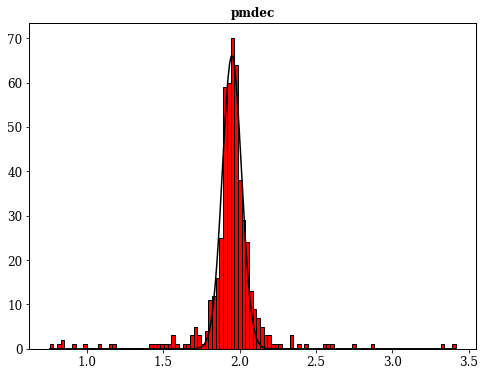

In [191]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 110
    # variables        = 3
    chi-square         = 10.9417318
    reduced chi-square = 0.10225918
    Akaike info crit   = -247.868591
    Bayesian info crit = -239.767150
[[Variables]]
    amplitude:  37.8677118 +/- 0.86822678 (2.29%) (init = 45.63395)
    center:     92.8860896 +/- 0.03150577 (0.03%) (init = 93.0114)
    sigma:      1.18783409 +/- 0.03133119 (2.64%) (init = 1.170101)
    fwhm:       2.79713548 +/- 0.07377931 (2.64%) == '2.3548200*sigma'
    height:     12.7181331 +/- 0.29136377 (2.29%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.576


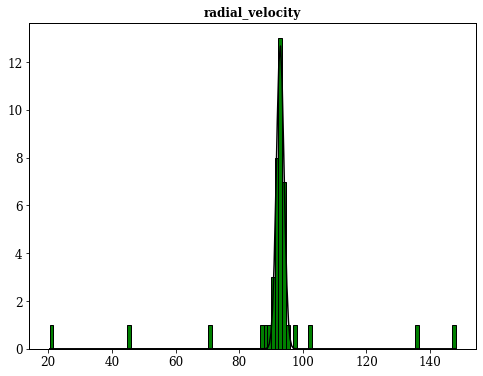

In [192]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()

## Sigma Clipping

500
301
283


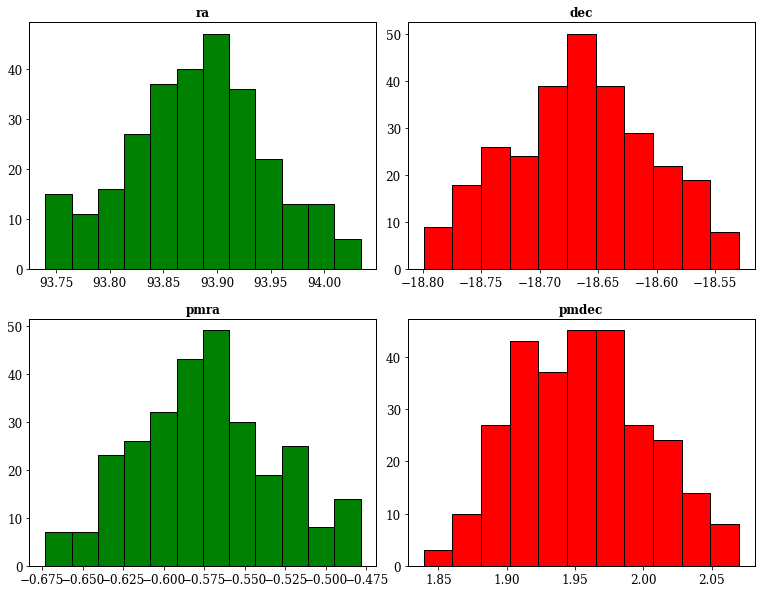

In [193]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(2):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & 
                              (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)  & (clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

    
print(len(clip_loop))

fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


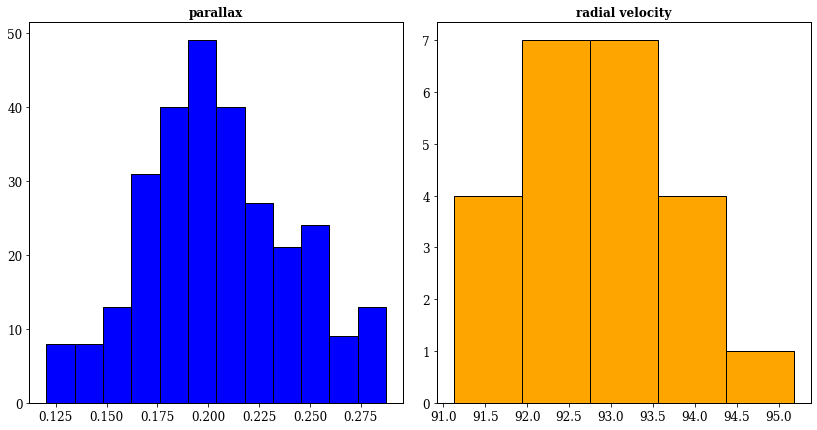

In [194]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax1.hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

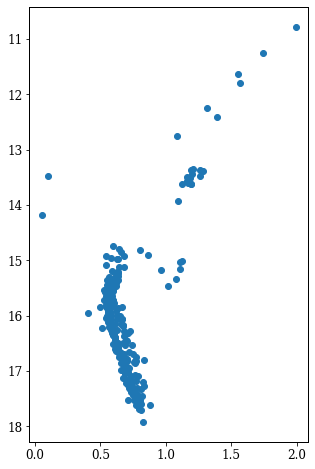

In [195]:
plt.figure(figsize=(5,8))
plt.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'])
plt.gca().invert_yaxis()

In [196]:
from astropy.coordinates import Distance

teste =  Distance(parallax=clip_loop['parallax'].to_numpy()*units.mas)

np.min(teste), np.max(teste)

(<Distance 3479.52395992 pc>, <Distance 8302.98980449 pc>)

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

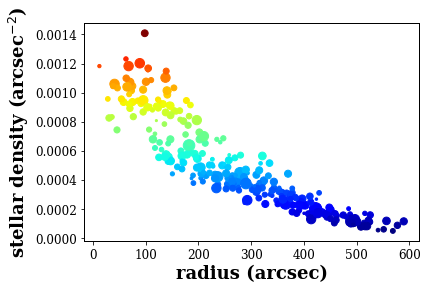

In [197]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [198]:
#final = df.loc[(df.parallax < paralaxe_up ) & (df.parallax > paralaxe_down) & (df.ra>ra_down) & (df.ra<ra_up) & 
#                              (df.dec>dec_down) & (df.dec<dec_up) & (df.pmra>pmra_down) & (df.pmra<pmra_up) & (df.pmdec>pmdec_down) 
#                              & (df.pmdec<pmdec_up)  & (df.radial_velocity.isnull() | (df.radial_velocity>radvel_down) & (df.radial_velocity<radvel_up)) ]

In [199]:
clip_loop.to_csv('final_5d.csv', index=False)

KeyError: 'bp_rp'

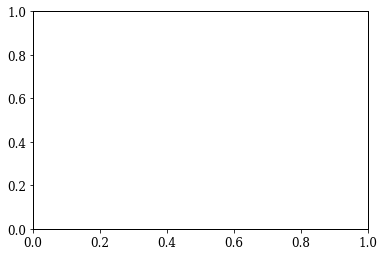

In [200]:
fig, ax = plt.subplots()
ax.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = '#0055FF')
ax.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'red')
ax.set_xlabel('BP - RP', fontweight = 'bold')
ax.set_ylabel('G', fontweight = 'bold')
ax.invert_yaxis()
plt.tight_layout()
#plt.savefig('campo.png', format = 'png', dpi = 300)

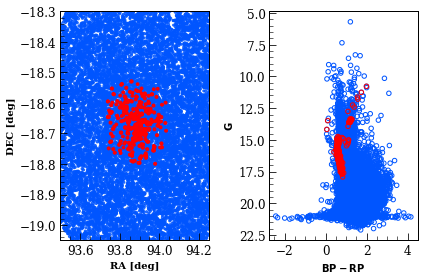

In [ ]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


ax1.scatter(df['ra'],df['dec'], color = '#0055FF',s=(25-df.phot_g_mean_mag), alpha = 0.8)
ax1.set_xlim(93.5,94.25)
ax1.set_ylim(-19.05,-18.3)
ax1.scatter(clip_loop['ra'],clip_loop['dec'], color = 'red', s=(25-clip_loop.phot_g_mean_mag), zorder = 10)
ax1.set_ylabel('DEC [deg]', fontweight = 'bold')
ax1.set_xlabel('RA [deg]', fontweight = 'bold')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)




ax2.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = 'None', edgecolor = '#0055FF', s = 20)
ax2.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'None', edgecolor = 'red', s =20)
ax2.set_xlabel('BP - RP', fontweight = 'bold')
ax2.set_ylabel('G', fontweight = 'bold')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')
#ax2.grid()

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('teste.jpg', format = 'jpg', dpi = 300)

In [ ]:
cantat_table = pd.read_csv('table_cantat.csv')
cantat_table.head()

,_RAJ2000,_DEJ2000,_r,RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA*,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
0,93.860491,-18.767444,0.099543,93.860488,-18.767435,2941932991511094016,0.197095,-0.527752,1.958853,NaN,194,16.044838,0.546896,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6789.6300,Simbad,93.860491,-18.767444
1,93.938545,-18.751383,0.097415,93.938542,-18.751374,2941933270687739776,0.168874,-0.604769,2.125844,NaN,236,15.917546,0.616865,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,7150.8320,Simbad,93.938545,-18.751383
2,93.885737,-18.768380,0.098435,93.885734,-18.768372,2941933305047495808,0.136240,-0.536132,1.915721,NaN,204,16.611238,0.647436,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6560.0825,Simbad,93.885737,-18.768380
3,93.916233,-18.746306,0.082901,93.916231,-18.746297,2941933442486435328,0.278221,-0.553534,2.001318,NaN,226,15.243904,0.636387,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6298.5566,Simbad,93.916233,-18.746306
4,93.917962,-18.736131,0.074381,93.917959,-18.736124,2941933476846171008,0.100664,-0.618487,1.760824,NaN,220,16.019342,0.561467,0.8,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6759.6340,Simbad,93.917962,-18.736131


In [ ]:
df = cantat_table[cantat_table.proba >= 0.9]

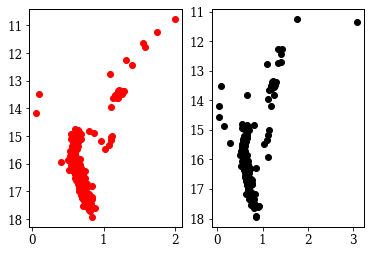

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))

ax1.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'red')
ax2.scatter(df['BP-RP'],df['Gmag'], color = 'k')
ax1.invert_yaxis()
ax2.invert_yaxis()

In [ ]:
len(cantat_table)

277

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

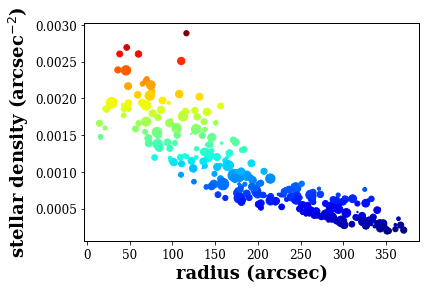

In [ ]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=cantat_table['_RAJ2000']*units.degree, dec=cantat_table['_DEJ2000']*units.degree, frame='fk5')

nstar = len(cantat_table)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([cantat_table['_RAJ2000']*np.cos(cantat_table['_DEJ2000']*np.pi/180.0), cantat_table['_DEJ2000']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(cantat_table['_RAJ2000'], weights=den_data)
std_x = np.average((cantat_table['_RAJ2000']-med_x)**2, weights=den_data)**0.5

med_y = np.average(cantat_table['_DEJ2000'], weights=den_data)
std_y = np.average((cantat_table['_DEJ2000']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(cantat_table['Gmag'])-cantat_table['Gmag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')

